In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('train_weather.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
X=df.drop(columns=['Weather Type'])
Y=df[['Weather Type']]

In [8]:
X.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [9]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


Processing X & Y
Applicable to  only Xgboost -Also need to label encode Y

In [10]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = make_pipeline(
SimpleImputer(strategy="median"),
StandardScaler()

)

In [13]:
cat_pipe= make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown='ignore',sparse_output=False)

)

In [14]:
pre=ColumnTransformer(\
    [
        ('num',num_pipe,con),
        ('cat',cat_pipe,cat)
    ]
    ).set_output(transform="pandas")


In [15]:
X.pre=pre.fit_transform(X)
X.pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Label encode Y Features

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y.pre= le.fit_transform(Y)

In [17]:
Y.pre

array([1, 0, 3, ..., 0, 2, 1])

In [18]:
from sklearn.model_selection  import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X.pre,Y.pre, test_size=0.2,random_state=42)

In [19]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Build the model

In [20]:
from xgboost import XGBClassifier
model= XGBClassifier(
n_estimators= 300,
max_depth = 3
)
model.fit(xtrain, ytrain, eval_set = [(xtest,ytest)],verbose = True)


[0]	validation_0-mlogloss:0.97147
[1]	validation_0-mlogloss:0.73961
[2]	validation_0-mlogloss:0.59453
[3]	validation_0-mlogloss:0.49711
[4]	validation_0-mlogloss:0.42963
[5]	validation_0-mlogloss:0.37995
[6]	validation_0-mlogloss:0.34550
[7]	validation_0-mlogloss:0.31773
[8]	validation_0-mlogloss:0.29676
[9]	validation_0-mlogloss:0.28140
[10]	validation_0-mlogloss:0.27045
[11]	validation_0-mlogloss:0.26128
[12]	validation_0-mlogloss:0.25350
[13]	validation_0-mlogloss:0.24705
[14]	validation_0-mlogloss:0.24239
[15]	validation_0-mlogloss:0.23729
[16]	validation_0-mlogloss:0.23383
[17]	validation_0-mlogloss:0.22940
[18]	validation_0-mlogloss:0.22719
[19]	validation_0-mlogloss:0.22441
[20]	validation_0-mlogloss:0.22247
[21]	validation_0-mlogloss:0.22027
[22]	validation_0-mlogloss:0.22021
[23]	validation_0-mlogloss:0.21890
[24]	validation_0-mlogloss:0.21854
[25]	validation_0-mlogloss:0.21761
[26]	validation_0-mlogloss:0.21682
[27]	validation_0-mlogloss:0.21576
[28]	validation_0-mlogloss:0.2

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
model.evals_result()

{'validation_0': OrderedDict([('mlogloss',
               [0.9714687358475093,
                0.7396058283068917,
                0.59452825304911,
                0.4971126744692976,
                0.4296309894289483,
                0.3799471796857137,
                0.34549570370917065,
                0.3177328184049464,
                0.29675599315457724,
                0.28140334335692,
                0.27045294601526676,
                0.2612778898420264,
                0.25350001258070043,
                0.24704522466160017,
                0.24238554518669844,
                0.2372895737940615,
                0.23383175012634388,
                0.22940060341833018,
                0.22719335747886252,
                0.2244101086138416,
                0.2224712858256129,
                0.22027480588153456,
                0.22021482861292138,
                0.21889935916370826,
                0.21854477096013866,
                0.21760723196379275,
           

In [22]:
loss=model.evals_result()['validation_0']['mlogloss']
loss

[0.9714687358475093,
 0.7396058283068917,
 0.59452825304911,
 0.4971126744692976,
 0.4296309894289483,
 0.3799471796857137,
 0.34549570370917065,
 0.3177328184049464,
 0.29675599315457724,
 0.28140334335692,
 0.27045294601526676,
 0.2612778898420264,
 0.25350001258070043,
 0.24704522466160017,
 0.24238554518669844,
 0.2372895737940615,
 0.23383175012634388,
 0.22940060341833018,
 0.22719335747886252,
 0.2244101086138416,
 0.2224712858256129,
 0.22027480588153456,
 0.22021482861292138,
 0.21889935916370826,
 0.21854477096013866,
 0.21760723196379275,
 0.21681745835973715,
 0.2157563761843476,
 0.21554097914587614,
 0.21590052267616336,
 0.2156463017558439,
 0.2151405417747204,
 0.21453236675852994,
 0.2148373668615408,
 0.21492327418042503,
 0.21448678124687637,
 0.21462988985482354,
 0.21483973114891067,
 0.21461808051881234,
 0.21453615348452854,
 0.2145088143365876,
 0.21452067214398113,
 0.2144590990867183,
 0.21400383721763566,
 0.21387806094712272,
 0.21405819719096172,
 0.2138053

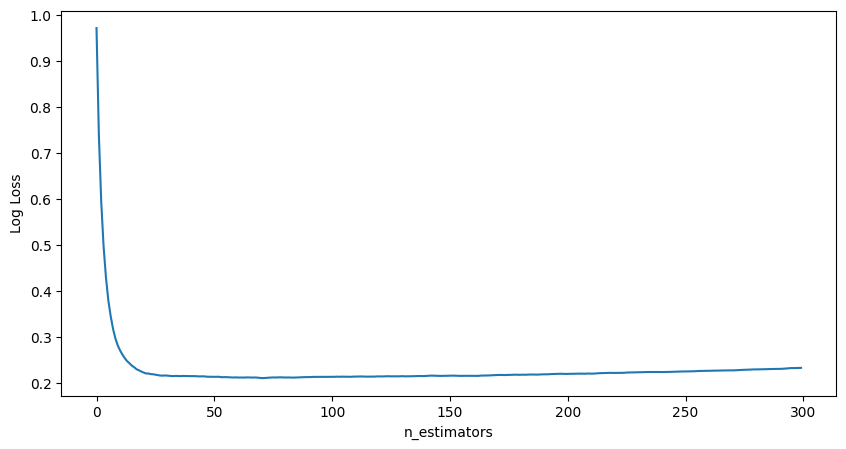

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(loss)
plt.xlabel("n_estimators")
plt.ylabel("Log Loss")
plt.show()

In [25]:
model.score(xtrain,ytrain)

0.9961174242424242

In [26]:
model.score(xtest,ytest)

0.9128787878787878

Cross Validated F1 Score

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring="f1_macro")
scores

array([0.91911932, 0.9086168 , 0.90742918, 0.91393434, 0.92101424])

In [29]:
scores.mean()

np.float64(0.9140227744821485)

Feature Importance

In [30]:
model.feature_importances_

array([0.08042917, 0.00592751, 0.0063642 , 0.0395065 , 0.0220015 ,
       0.07620671, 0.03669349, 0.6053045 , 0.01309693, 0.02138668,
       0.00768963, 0.00563845, 0.0039    , 0.00299883, 0.05730655,
       0.00820474, 0.00275087, 0.00459381], dtype=float32)

In [32]:
imp=pd.Series(
      model.feature_importances_,
      index=xtrain.columns
)

imp

num__Temperature                  0.080429
num__Humidity                     0.005928
num__Wind Speed                   0.006364
num__Precipitation (%)            0.039506
num__Atmospheric Pressure         0.022001
num__UV Index                     0.076207
num__Visibility (km)              0.036693
cat__Cloud Cover_clear            0.605304
cat__Cloud Cover_cloudy           0.013097
cat__Cloud Cover_overcast         0.021387
cat__Cloud Cover_partly cloudy    0.007690
cat__Season_Autumn                0.005638
cat__Season_Spring                0.003900
cat__Season_Summer                0.002999
cat__Season_Winter                0.057307
cat__Location_coastal             0.008205
cat__Location_inland              0.002751
cat__Location_mountain            0.004594
dtype: float32

In [33]:
imp.sort_values(ascending=False)

cat__Cloud Cover_clear            0.605304
num__Temperature                  0.080429
num__UV Index                     0.076207
cat__Season_Winter                0.057307
num__Precipitation (%)            0.039506
num__Visibility (km)              0.036693
num__Atmospheric Pressure         0.022001
cat__Cloud Cover_overcast         0.021387
cat__Cloud Cover_cloudy           0.013097
cat__Location_coastal             0.008205
cat__Cloud Cover_partly cloudy    0.007690
num__Wind Speed                   0.006364
num__Humidity                     0.005928
cat__Season_Autumn                0.005638
cat__Location_mountain            0.004594
cat__Season_Spring                0.003900
cat__Season_Summer                0.002999
cat__Location_inland              0.002751
dtype: float32

<Axes: >

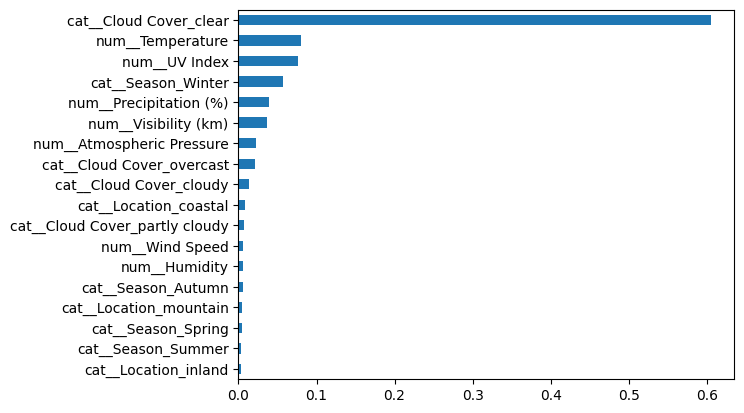

In [35]:
imp.sort_values().plot(kind='barh')

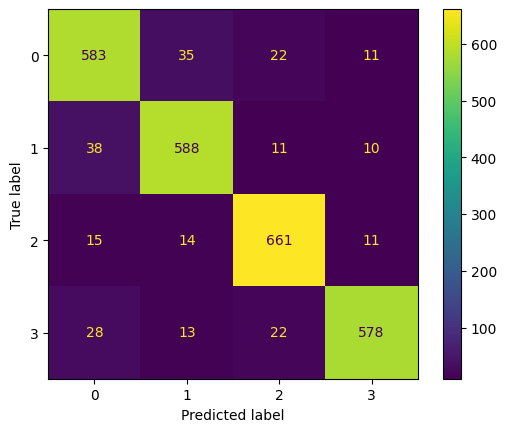

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model,xtest,ytest)

In [37]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)


In [38]:
ytrain[0:5]

array([1, 1, 3, 1, 0])

In [39]:
from sklearn.metrics import classification_report
print (classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       651
           1       0.90      0.91      0.91       647
           2       0.92      0.94      0.93       701
           3       0.95      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



Out of Sample Prediction

In [40]:
xnew= pd.read_csv('test_weather.csv')
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [41]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [42]:
xnew.pre=pre.transform(xnew)
xnew.pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [43]:
ypred=model.predict(xnew.pre)
yprob= model.predict_proba(xnew.pre)

In [44]:
ypred[0:5]

array([2, 3, 0, 1, 3])

In [45]:
le

LabelEncoder()

In [46]:
ypred_lb=le.inverse_transform(ypred)
ypred_lb[0:5]

array(['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny'], dtype=object)

In [47]:
yprob[0:5]

array([[6.9930429e-06, 3.2922300e-05, 9.9994397e-01, 1.6076094e-05],
       [1.8633101e-02, 4.4759587e-04, 1.1654436e-05, 9.8090762e-01],
       [9.9058199e-01, 2.4051499e-03, 4.9871783e-04, 6.5140948e-03],
       [2.0203758e-03, 9.9661523e-01, 3.2511944e-04, 1.0392354e-03],
       [1.7833960e-05, 1.8272566e-04, 6.4569205e-04, 9.9915373e-01]],
      dtype=float32)

In [48]:
import numpy as np
max_probs = np.max(yprob,axis=1)
max_probs[0:5]

array([0.999944  , 0.9809076 , 0.990582  , 0.99661523, 0.99915373],
      dtype=float32)

In [49]:
xnew['Weather Type'] =ypred_lb
xnew["Probablity"]=max_probs

In [50]:
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Probablity
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.999944
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.980908
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.990582
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.996615
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.999154
...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.999464
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.999730
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.999776
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.999957


In [51]:
xnew.to_csv("XGBResults.csv",index=False)